In [506]:
#imports
import numpy as np
import pandas as pd
import sqlalchemy as sa
import lxml as lx
import html5lib as h5
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [283]:
# Read in csv file
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ-HsRi1tiKAezCiCZ8B3IBD_xDp_q-ECJKqEgFOeUEV_tw86x_4ws7QgeYP0ZIgPDG_8f_oZdS2xQ2/pub?output=csv')

# Parsing data fields and converting to numeric and datetime fields
df['Temp'] = pd.to_numeric(dfrto1['Temp'])
df['month'] = pd.to_numeric(df['datetime_beginning_utc'].str.split('/',expand = True)[0])
df['day'] = pd.to_numeric(df['datetime_beginning_utc'].str.split('/',expand = True)[1])
df['year'] = pd.to_numeric(df['datetime_beginning_utc'].str.split('/',expand = True)[2].str.split(expand = True)[0])
df['hour'] = pd.to_numeric(df['datetime_beginning_utc'].str.split('/',expand = True)[2].str.split(expand = True)[1].str.split(':',expand = True)[0])
df['datetime_beginning_ept'] = pd.to_datetime(dfrto1['datetime_beginning_ept'],format = '%m/%d/%Y %H:%M:%S %p')

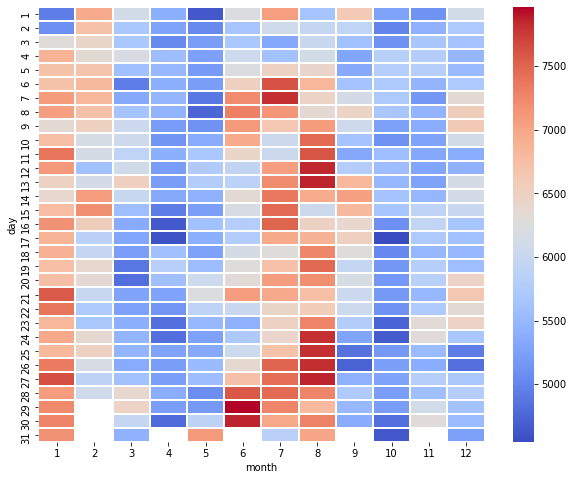

In [350]:
# Heatmap showing the top months(x axis) and days(y axis) for peak grid use.
plt.figure(figsize=(10,8))
sns.heatmap(df.pivot_table(index='day',columns='month',values='mw'),linewidths=1,fmt='.1f',linecolor='white',cmap='coolwarm')

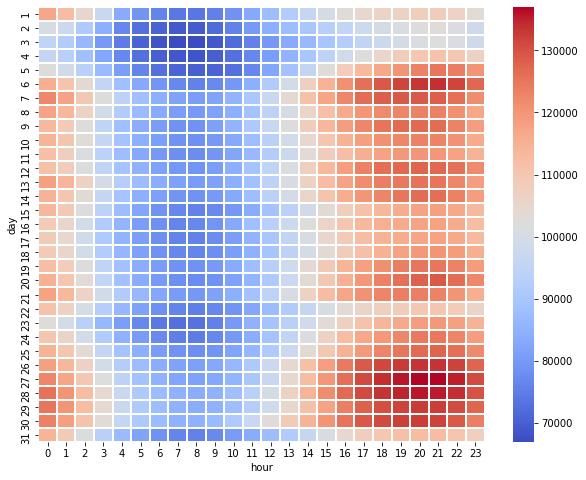

In [349]:
# Heatmap showing the days(y axis) and hours(x axis) that the grid peaks. 
plt.figure(figsize=(10,8))
sns.heatmap(dfrto.pivot_table(index='day',columns='hour',values='mw'),linewidths=1,fmt='.1f',linecolor='white',cmap='coolwarm')

In [502]:
plt.figure(figsize=(10,8))
dfrto.iplot(kind='scatter',x='mw',y='Temp',mode='markers')

<Figure size 720x576 with 0 Axes>

In [327]:
# Filter data to months and zone for model
dfrto = df[(df['month'] > 5) & (df['month'] < 9 ) & (df['zone'] == 'RTO')]
dfrto

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified,Temp,Dew,Humidity,month,day,year,hour
29,6/1/2021 4:00,2021-06-01 12:00:00,RTO,RTO,RTO,RTO,63727.422,False,53.24,7.1,72.93,6,1,2021,4
59,6/1/2021 5:00,2021-06-01 01:00:00,RTO,RTO,RTO,RTO,61428.685,False,53.42,6.7,70.12,6,1,2021,5
89,6/1/2021 6:00,2021-06-01 02:00:00,RTO,RTO,RTO,RTO,60224.437,False,51.62,7.0,77.02,6,1,2021,6
119,6/1/2021 7:00,2021-06-01 03:00:00,RTO,RTO,RTO,RTO,59810.891,False,52.52,6.6,72.19,6,1,2021,7
149,6/1/2021 8:00,2021-06-01 04:00:00,RTO,RTO,RTO,RTO,60882.484,False,50.90,6.7,77.52,6,1,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263399,6/1/2022 23:00,2022-06-01 07:00:00,RTO,RTO,RTO,RTO,117935.477,False,83.30,15.0,43.81,6,1,2022,23
263429,6/2/2022 0:00,2022-06-01 08:00:00,RTO,RTO,RTO,RTO,113068.907,False,80.96,15.7,49.69,6,2,2022,0
263459,6/2/2022 1:00,2022-06-01 09:00:00,RTO,RTO,RTO,RTO,108411.823,False,77.54,15.7,55.48,6,2,2022,1
263489,6/2/2022 2:00,2022-06-01 10:00:00,RTO,RTO,RTO,RTO,100703.863,False,74.84,15.9,61.39,6,2,2022,2


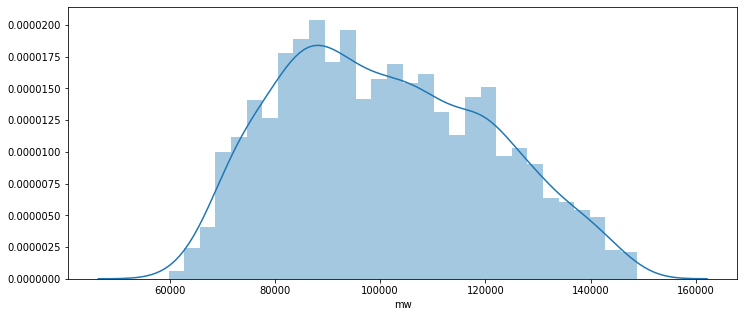

In [346]:
# Display of dataset mw peaks
plt.figure(figsize=(12,5))
sns.distplot(dfrto['mw'], bins = 30)

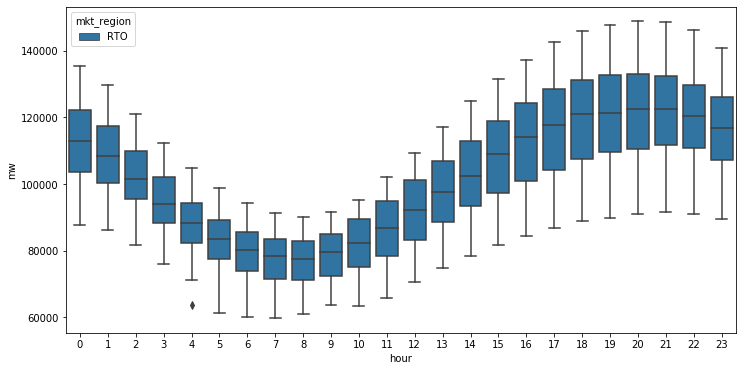

In [344]:
#Display of data use by hour
plt.figure(figsize=(12,6))
sns.boxplot(x='hour',y='mw',data=dfrto[(dfrto['zone'] == 'RTO')],hue='mkt_region')

In [262]:
#Display of data use by hour
dfrto.iplot(kind='bar',x='hour',y='mw')

In [263]:
#Display of data mw
dfrto[['mw']].iplot(kind='hist')

In [475]:
# Grid for statistical analysis of dataset
dfrto.describe()

,mw,Temp,Dew,Humidity,month,day,year,hour
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.00000,2232.000000,2232.000000,2232.000000
mean,101038.026103,71.337016,15.975090,71.345780,7.00000,15.679211,2021.012545,11.500000
std,19669.395890,7.969675,3.837719,15.809036,0.81668,8.937612,0.111324,6.923738
min,59810.891000,44.600000,0.400000,24.330000,6.00000,1.000000,2021.000000,0.000000
25%,85374.755000,66.380000,13.800000,59.215000,6.00000,8.000000,2021.000000,5.750000
50%,99335.338000,70.700000,17.000000,74.995000,7.00000,16.000000,2021.000000,11.500000
75%,116331.366500,76.820000,18.825000,85.022500,8.00000,23.000000,2021.000000,17.250000
max,148770.347000,92.480000,22.100000,94.860000,8.00000,31.000000,2022.000000,23.000000


In [483]:
dfrto['mw'].mean()

101038.02610259836

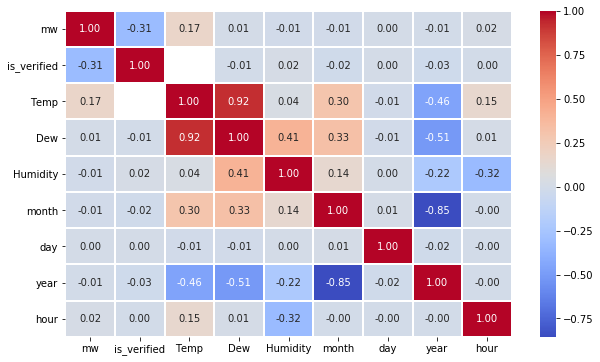

In [340]:
# Display of correlations for variable analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',lw=1,fmt='.2f')

In [484]:
# Column selection for analysis
X= dfrto[['Temp', 'Dew','Humidity']]
y = dfrto['mw']

In [485]:
#Training data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [486]:
# ML algorithm for model called
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [487]:
# Results of Linear Regression added to a dataframe
results = pd.DataFrame(lm.coef_,X.columns,columns=['Value'])
results

,Value
Temp,616.286002
Dew,2745.035212
Humidity,-721.187221


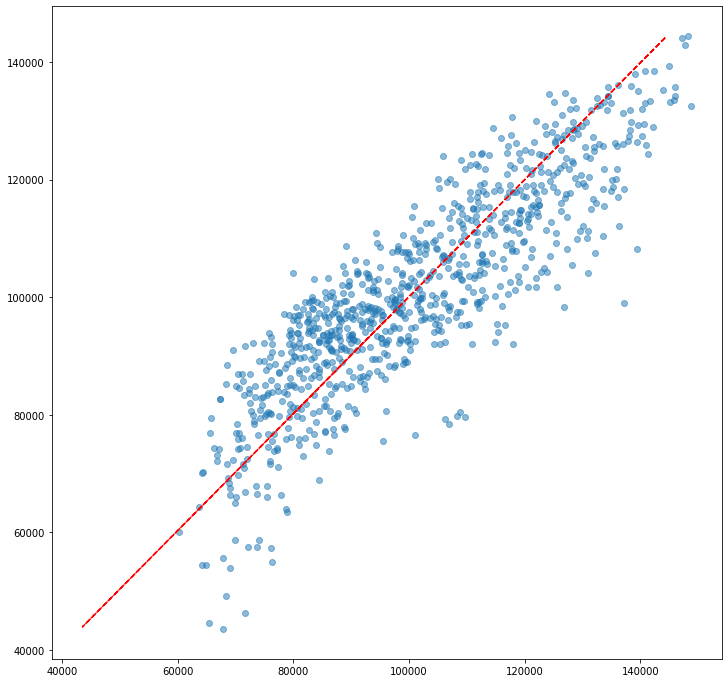

In [521]:
#Test set checked with predictions and graphed.
predictions = lm.predict(X_test)

plt.figure(figsize=(12,12))
plt.scatter(y_test,predictions,alpha=0.5)

z = np.polyfit(predictions, y_test, 1)
p = np.poly1d(z)
plt.plot(predictions,p(predictions),"r--")


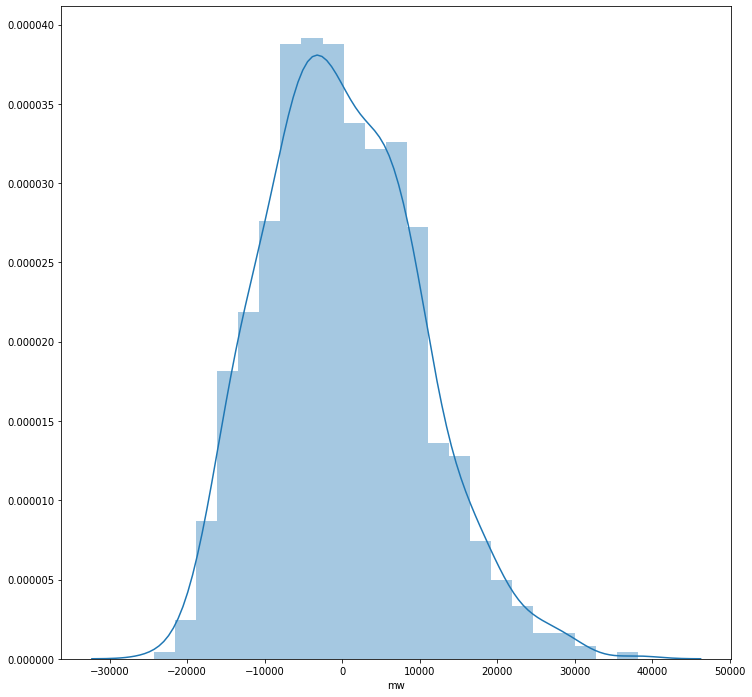

In [489]:
# Training set graphed with test set
plt.figure(figsize=(12,12))
sns.distplot((y_test-predictions))

In [492]:
# Slider for predicting grid peak based off temperature
tempSlider =    widgets.FloatSlider(
                    value=85.0,
                    min = 50.0,
                    max=120.0,
                    description='Temp:'  
                    )

def tempSelect(value):
    return round(results[0:1] * value + dfrto['mw'].mean(),1)

widgets.interact(tempSelect,value=tempSlider)

interactive(children=(FloatSlider(value=85.0, description='Temp:', max=120.0, min=50.0), Output()), _dom_class…

<function __main__.tempSelect(value)>

In [493]:
# Slider for predicting grid peak based off humidity
humidSlider =    widgets.FloatSlider(
    value=12.5,
    min = 0.0,
    max=25.0,
    description='Dew:'
    
)

def humidSelect(value):
    return round(results[1:2] * value + dfrto['mw'].mean(),1)

widgets.interact(humidSelect,value=humidSlider)

interactive(children=(FloatSlider(value=12.5, description='Dew:', max=25.0), Output()), _dom_classes=('widget-…

<function __main__.humidSelect(value)>